In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pickle
import cv2

2025-05-19 14:33:34.005073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747665214.208656      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747665214.265464      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ Đúng số cột: 43 cột
✅ Đã lọc 0 dòng lỗi. Còn lại: 2031 dòng hợp lệ.


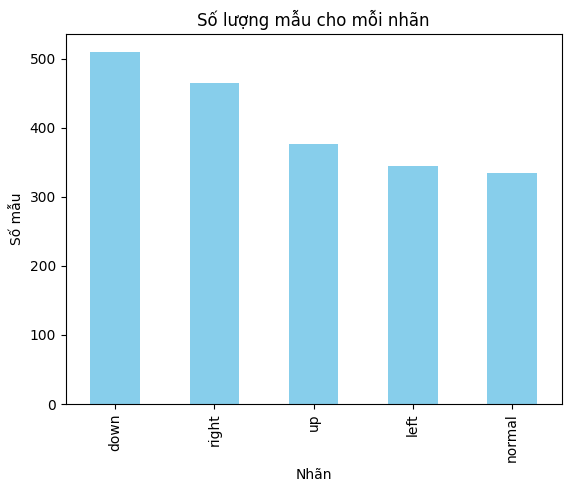

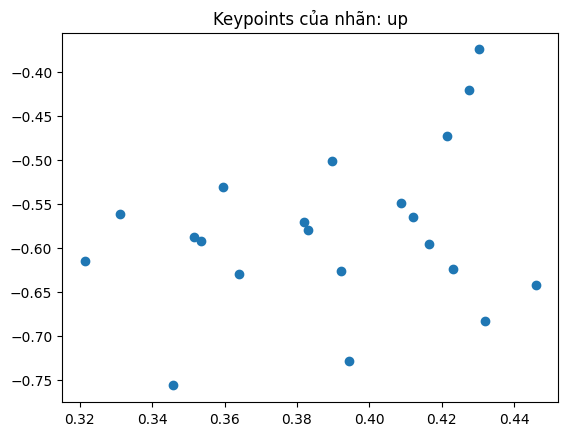

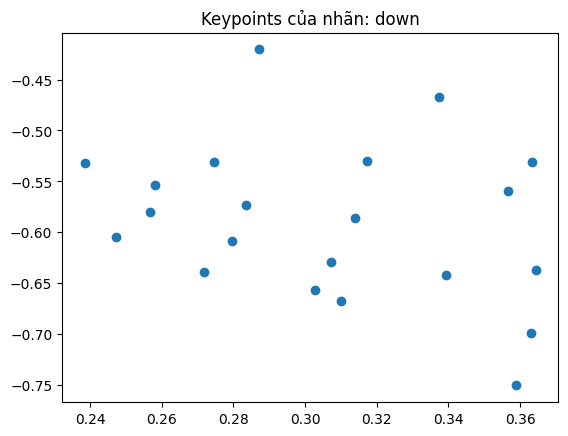

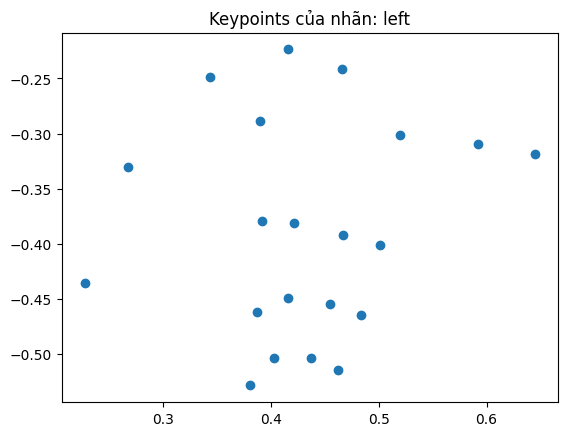

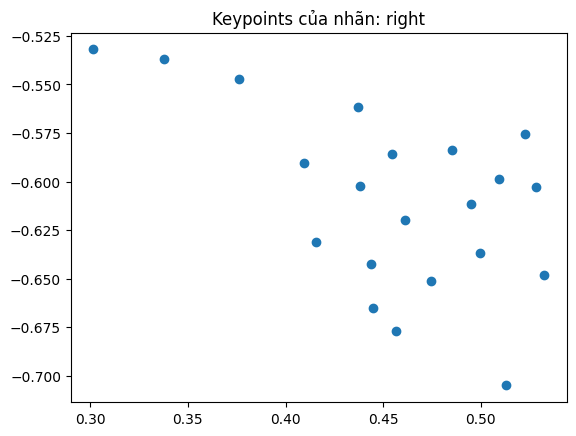

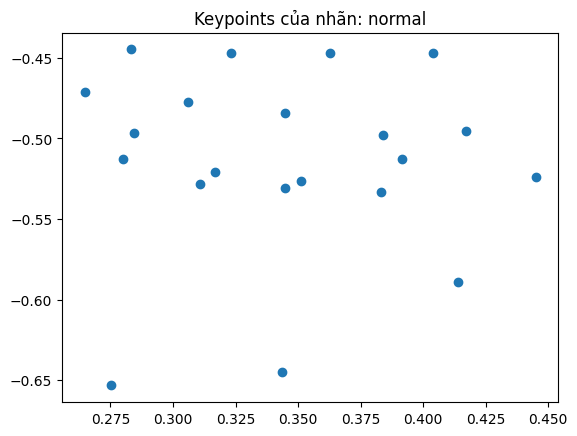

In [6]:
# Đọc dữ liệu từ file CSV
dataset_path = "/kaggle/input/udlr-dataset/hand_gesture_data.csv"
df = pd.read_csv(dataset_path)

# Kiểm tra số cột hợp lệ (label_stt + 42 tọa độ)
expected_columns = 43
if df.shape[1] != expected_columns:
    print(f"❌ Số cột không khớp: {df.shape[1]} cột, cần {expected_columns} cột")
else:
    print(f"✅ Đúng số cột: {df.shape[1]} cột")

# Lọc dữ liệu thiếu
df_clean = df.dropna()
print(f"✅ Đã lọc {len(df) - len(df_clean)} dòng lỗi. Còn lại: {len(df_clean)} dòng hợp lệ.")

# Tách nhãn thực từ label_stt (vd: "up_1" -> "up")
df_clean['label'] = df_clean['label_stt'].apply(lambda x: x.split('_')[0])

# Biểu đồ số lượng mẫu cho mỗi nhãn
df_clean['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Số lượng mẫu cho mỗi nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Số mẫu')
plt.show()

# Vẽ keypoints của từng nhãn
for label in df_clean['label'].unique():
    sample = df_clean[df_clean['label'] == label].iloc[0]
    keypoints = sample.drop(['label_stt', 'label']).values.astype(float)
    x = keypoints[::2]
    y = keypoints[1::2]
    plt.scatter(x, -y)
    plt.title(f"Keypoints của nhãn: {label}")
    plt.show()

# Chuẩn bị dữ liệu và mã hóa nhãn
X = df_clean.drop(['label_stt', 'label'], axis=1).values.astype(np.float32)
y = df_clean['label'].values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747665490.049154      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/50


I0000 00:00:1747665493.212464      99 service.cc:148] XLA service 0x7d5e9c005020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747665493.212988      99 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747665493.427616      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


49/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3044 - loss: 1.5423

I0000 00:00:1747665494.726079      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3084 - loss: 1.5376 - val_accuracy: 0.4914 - val_loss: 1.2555
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5322 - loss: 1.2260 - val_accuracy: 0.7764 - val_loss: 0.8567
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7565 - loss: 0.8385 - val_accuracy: 0.9730 - val_loss: 0.4970
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8725 - loss: 0.5431 - val_accuracy: 0.9853 - val_loss: 0.2933
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9496 - loss: 0.3481 - val_accuracy: 0.9853 - val_loss: 0.1835
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.2355 - val_accuracy: 0.9926 - val_loss: 0.1153
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9810 - loss: 0.1731 - val_accuracy: 0.9926 - val_loss: 0.0777
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9824 - loss: 0.1414 - val_accuracy: 0.9926 - val_loss: 0.0606
Ep

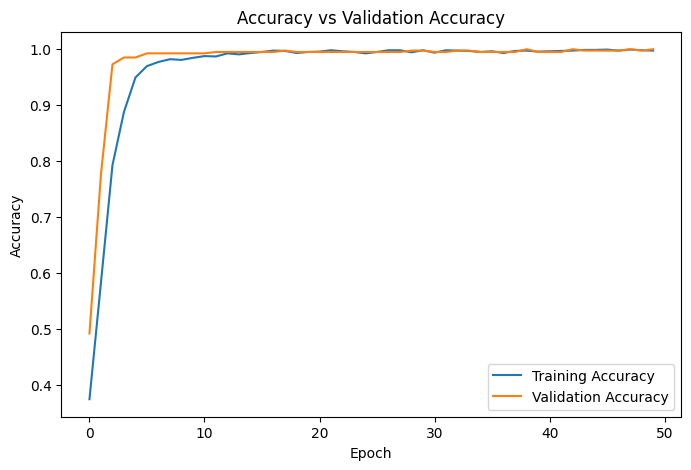

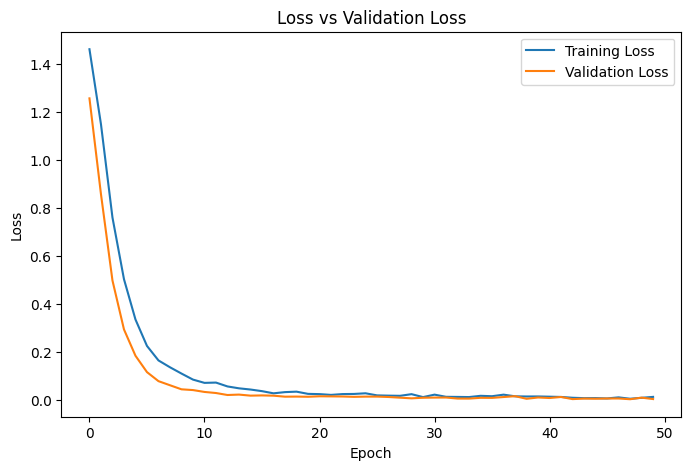

In [7]:
# Xây dựng mô hình MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Vẽ biểu đồ Accuracy và Val_Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Vẽ biểu đồ Loss và Val_Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
# Lưu model và label encoder vào /kaggle/working
model.save("/kaggle/working/keypoint_classifier_model.h5")
with open('/kaggle/working/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("✅ Đã lưu model vào /kaggle/working/keypoint_classifier_model.h5")
print("✅ Đã lưu label encoder vào /kaggle/working/label_encoder.pkl")


✅ Đã lưu model vào /kaggle/working/keypoint_classifier_model.h5
✅ Đã lưu label encoder vào /kaggle/working/label_encoder.pkl
